# 用神经网络来学习XOR函数迭代版

In [269]:
import numpy as np  # Note: there is a typo on this line in the video

[ -1.00000000e+00  -8.00000000e-01  -6.00000000e-01  -4.00000000e-01
  -2.00000000e-01  -2.22044605e-16   2.00000000e-01   4.00000000e-01
   6.00000000e-01   8.00000000e-01   1.00000000e+00   1.20000000e+00
   1.40000000e+00   1.60000000e+00   1.80000000e+00   2.00000000e+00
   2.20000000e+00   2.40000000e+00   2.60000000e+00   2.80000000e+00
   3.00000000e+00   3.20000000e+00   3.40000000e+00   3.60000000e+00
   3.80000000e+00   4.00000000e+00   4.20000000e+00   4.40000000e+00
   4.60000000e+00   4.80000000e+00] [  4.           3.4872136    2.79245553   2.13459667   1.53442719   1.
   0.53544512   0.14321596  -0.17508894  -0.41835921  -0.58578644
  -0.6767603   -0.69080666  -0.62754845  -0.48667995  -0.26794919
   0.02885438   0.40390889   0.8573666    1.38935887   2.           2.68939015
   3.4576177    4.30476106   5.23089023   6.23606798   7.32035085
   8.48379001   9.72643191  11.04831892]


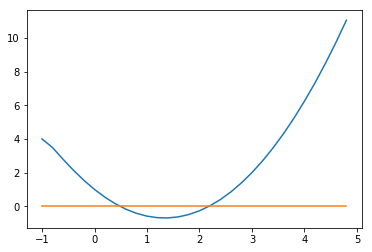

x,y,y1,yh
0.5
-0.0252551286084
2.1824
-0.00040199032178


In [270]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(-1,5,0.2)

y=x*x+np.sqrt(x+1)-3*x

y0=(x+x)*0

print(x,y)

plt.plot(x,y)
plt.plot(x,y0)

plt.show()

print("x,y,y1,yh")

x=0.5
print(x)
yl=x*x+np.sqrt(x+1)-3*x
print(yl)

x=2.1824
print(x)
yh=x*x+np.sqrt(x+1)-3*x
print(yh)




# 首先，定义一个sigmod函数

In [271]:
def nonlin(x, deriv=False):  
    if(deriv==True):
        return (x*(1-x))
    
    return 1/(1+np.exp(-x))

# 1/(1+exp(-x)) 导数推导

(1/(1+exp(-x)))'=((1+exp(-x))^-1)'=(-1)((1+exp(-x))^-2)(1+exp(-x))'=(-1)((1+exp(-x))^-2)(exp(-x))'
而(exp(-x))'可以先转成(exp(x)^-1)'，于是她又是一个复合函数的求导，即(exp(x)^-1)对exp(x)的导数再乘上exp(x)对x的导数，又基本初等函数求导公式告诉我们，(exp(x))'=exp(x)，所以(exp(-x))'=(exp(x)^-1)'=(-1)(exp(x)^-2)(exp(x))'=(-1)(exp(x)^-2)exp(x)=(-1)(exp(x)^-1)=(-1)exp(-x)
那么：
(-1)((1+exp(-x))^-2)(exp(-x))'=(-1)((1+exp(-x))^-2)(-1)exp(-x)=exp(-x)((1+exp(-x))^-2)=exp(-x)/((1+exp(-x))^2) 

![](dsigmoid.png)


[  4.53978687e-05   3.35350130e-04   2.47262316e-03   1.79862100e-02
   1.19202922e-01   5.00000000e-01   8.80797078e-01   9.82013790e-01
   9.97527377e-01   9.99664650e-01]


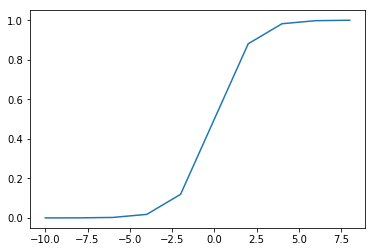

In [272]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(-10,10,2)
y=nonlin(x)
print(y)
plt.plot(x,y)
plt.show()


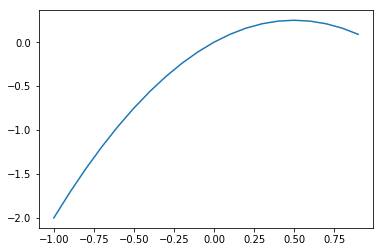

In [273]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(-1,1,0.1)
yderiv=nonlin(x,deriv=True)
plt.plot(x,yderiv)
plt.show()


# 复习一下表格试凑法

![](weights_solution.png)

![](BPBSYN0SYN1.png)

In [274]:
syn0=np.array([[-10,-20,20,20],
              [-10,20,-20,20],
              [10,0.2,-1,-20]])
print(syn0)

syn1=np.array([[0],
              [1.0],
              [1.0],
              [0]])



[[-10.  -20.   20.   20. ]
 [-10.   20.  -20.   20. ]
 [ 10.    0.2  -1.  -20. ]]


# 所有可能的输入值放在一个向量中

In [275]:
#input data
xinputs = np.array([[0,0,1], 
            [0,1,1],
            [1,0,1],
            [1,1,1]])


# 计算第一层的线性输出


In [276]:
SO1=np.dot(xinputs,syn0)
print(SO1)

[[ 10.    0.2  -1.  -20. ]
 [  0.   20.2 -21.    0. ]
 [  0.  -19.8  19.    0. ]
 [-10.    0.2  -1.   20. ]]


In [277]:
l1=nonlin(SO1)
print(l1)

[[  9.99954602e-01   5.49833997e-01   2.68941421e-01   2.06115362e-09]
 [  5.00000000e-01   9.99999998e-01   7.58256042e-10   5.00000000e-01]
 [  5.00000000e-01   2.51749871e-09   9.99999994e-01   5.00000000e-01]
 [  4.53978687e-05   5.49833997e-01   2.68941421e-01   9.99999998e-01]]


In [278]:
SO2=np.dot(l1,syn1)
print(SO2)

[[ 0.81877542]
 [ 1.        ]
 [ 1.        ]
 [ 0.81877542]]


In [279]:
l2=nonlin(SO2)
print(l2)

[[ 0.69397633]
 [ 0.73105858]
 [ 0.73105858]
 [ 0.69397633]]


# 希望的的输出结果

In [280]:
#output data
y = np.array([[0],
             [1],
             [1],
             [0]])

# 误差是

In [281]:
l2_error=y-l2
print(l2_error)

[[-0.69397633]
 [ 0.26894142]
 [ 0.26894142]
 [-0.69397633]]


# 为了直观地得出总误差多大，引入绝对值平均值lmabs

In [282]:
#误差的平均绝对为
lms=np.mean(np.abs(l2_error))
print(lms)

#sk=[]
#yerrorlmss=[]
#syn1_0=[]
#sks=0

#syn1_0.append(syn1[0,0])
#sk.append(sks)
#yerrorlmss.append(lms)
#sks=sks+1


0.481458877718


# 利用误差修正第二层权值网络

In [283]:
l2_delta = l2_error*nonlin(l2, deriv=True)

In [284]:
print(l2_delta)

[[-0.14738196]
 [ 0.05287709]
 [ 0.05287709]
 [-0.14738196]]


# 计算第一层的误差

In [285]:
print(syn1)

[[ 0.]
 [ 1.]
 [ 1.]
 [ 0.]]


In [286]:
print(syn1.T)

[[ 0.  1.  1.  0.]]


In [287]:
l1_error = l2_delta.dot(syn1.T)
print(l1_error)

[[ 0.         -0.14738196 -0.14738196  0.        ]
 [ 0.          0.05287709  0.05287709  0.        ]
 [ 0.          0.05287709  0.05287709  0.        ]
 [ 0.         -0.14738196 -0.14738196  0.        ]]


# 计算第一层的修正值

In [288]:
l1_delta = l1_error * nonlin(l1,deriv=True)
print(l1_delta)

[[  0.00000000e+00  -3.64794782e-02  -2.89770525e-02   0.00000000e+00]
 [  0.00000000e+00   8.92316747e-11   4.00943751e-11   0.00000000e+00]
 [  0.00000000e+00   1.33118013e-10   2.96259587e-10   0.00000000e+00]
 [  0.00000000e+00  -3.64794782e-02  -2.89770525e-02   0.00000000e+00]]


# 修正权值网络

In [289]:
syn1 += l1.T.dot(l2_delta)
syn0 += l0.T.dot(l1_delta)    

In [290]:
print(syn0)
print(syn1)

[[-10.         -20.03647948  19.97102295  20.        ]
 [-10.          19.96352052 -20.02897705  20.        ]
 [ 10.           0.12704104  -1.0579541  -20.        ]]
[[-0.09450487]
 [ 0.89080587]
 [ 0.97360286]
 [-0.09450487]]


![](syn01delta.png)

# 机器迭代最终答案

In [291]:
#training step
# Python2 Note: In the follow command, you may improve 
#   performance by replacing 'range' with 'xrange'. 
for j in range(1000):  
    
    print("start forward calulate")
    l0 = xinputs
    print("l0")
    print(l0)    
    l1 = nonlin(np.dot(l0, syn0))
    print("l1")
    print(l1)
    l2 = nonlin(np.dot(l1, syn1))
    print("l2")
    print(l2)
    
    # Back propagation of errors using the chain rule. 
    l2_error = y - l2
    
    print("l2")
    print(l2)
    
    print("l2_error")
    print(l2_error)
    
 #   lms=np.mean(np.abs(l2_error))
 #   syn1_0.append(syn1[0,0])
 #   sk.append(sks)
 #   yerrorlmss.append(lms)
 #   sks=sks+1
    
    print("Error:")
    print(lms)
        
    l2_delta = l2_error*nonlin(l2, deriv=True)
    
    print("nonline derive")
    print(nonlin(l2,deriv=True))
    
    print("l2_delta")      
    print(l2_delta)
          
    l1_error = l2_delta.dot(syn1.T)
    
    print("syn1.T")
    print(syn1.T)
    
    print("l1_error")
    print(l1_error)
    
    l1_delta = l1_error * nonlin(l1,deriv=True)
    
    print("nonlin(l1,deriv=True)")
    print(nonlin(l1,deriv=True))
        
    
    #update weights (no learning rate term)
    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)
    
    print("syn0 syn1")
    
    print(syn0)
    print(syn1)
    
print("Output after training")
print(l2)

print(syn1_0)
print(yerrorlmss)
   

start forward calulate
l0
[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
l1
[[  9.99954602e-01   5.31717614e-01   2.57700622e-01   2.06115362e-09]
 [  5.00000000e-01   9.99999998e-01   6.95123799e-10   5.00000000e-01]
 [  5.00000000e-01   2.25652812e-09   9.99999994e-01   5.00000000e-01]
 [  4.53978687e-05   5.13517227e-01   2.46771057e-01   9.99999998e-01]]
l2
[[ 0.65250185]
 [ 0.68918267]
 [ 0.70663527]
 [ 0.64638625]]
l2
[[ 0.65250185]
 [ 0.68918267]
 [ 0.70663527]
 [ 0.64638625]]
l2_error
[[-0.65250185]
 [ 0.31081733]
 [ 0.29336473]
 [-0.64638625]]
Error:
0.481458877718
nonline derive
[[ 0.22674318]
 [ 0.21420992]
 [ 0.20730187]
 [ 0.22857107]]
l2_delta
[[-0.14795035]
 [ 0.06658015]
 [ 0.06081506]
 [-0.14774519]]
syn1.T
[[-0.09450487  0.89080587  0.97360286 -0.09450487]]
l1_error
[[ 0.01398203 -0.13179504 -0.14404488  0.01398203]
 [-0.00629215  0.05930999  0.06482263 -0.00629215]
 [-0.00574732  0.05417441  0.05920971 -0.00574732]
 [ 0.01396264 -0.13161229 -0.14384514  0.01396264]]
nonlin(l1,

syn0 syn1
[[-10.39494001 -20.58105708  19.54250338  19.64549831]
 [-10.57116972  19.41894294 -20.45749667  19.48496148]
 [  9.03406862  -1.21930517  -2.16237879 -20.86954022]]
[[-1.75351252]
 [ 1.77886314]
 [ 2.13442762]
 [-1.44415363]]
start forward calulate
l0
[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
l1
[[  9.99880738e-01   2.28058750e-01   1.03180125e-01   8.63920628e-10]
 [  1.76957085e-01   9.99999988e-01   1.50076574e-10   2.00274641e-01]
 [  2.04098715e-01   3.40583002e-10   9.99999972e-01   2.27225933e-01]
 [  6.57623818e-06   8.46005842e-02   4.40503444e-02   9.99999988e-01]]
l2
[[ 0.24464354]
 [ 0.76482899]
 [ 0.80975034]
 [ 0.23153748]]
l2
[[ 0.24464354]
 [ 0.76482899]
 [ 0.80975034]
 [ 0.23153748]]
l2_error
[[-0.24464354]
 [ 0.23517101]
 [ 0.19024966]
 [-0.23153748]]
Error:
0.481458877718
nonline derive
[[ 0.18479308]
 [ 0.17986561]
 [ 0.15405473]
 [ 0.17792788]]
l2_delta
[[-0.04520843]
 [ 0.04229918]
 [ 0.02930886]
 [-0.04119697]]
syn1.T
[[-1.75351252  1.77886314  2.13442762 -

 [ 0.04301813 -0.04227493 -0.04705362  0.03587404]]
nonlin(l1,deriv=True)
[[  1.67276539e-04   1.42415337e-01   7.72722627e-02   6.31655985e-10]
 [  1.00236386e-01   1.94849698e-08   1.12892030e-10   1.15717595e-01]
 [  1.17118168e-01   2.18032359e-10   3.76320060e-08   1.32585641e-01]
 [  3.34061914e-06   4.85013934e-02   3.05267045e-02   2.19467302e-08]]
syn0 syn1
[[-10.55272085 -20.67690225  19.4780548   19.50098776]
 [-10.76008467  19.32309779 -20.5219453   19.30877134]
 [  8.68760465  -1.57983819  -2.38929847 -21.19024094]]
[[-2.36951867]
 [ 2.32715174]
 [ 2.58668216]
 [-1.97713505]]
start forward calulate
l0
[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
l1
[[  9.99831365e-01   1.70818400e-01   8.39923903e-02   6.26895700e-10]
 [  1.11800533e-01   9.99999980e-01   1.12143281e-10   1.32220164e-01]
 [  1.34107831e-01   2.15784597e-10   9.99999962e-01   1.55874079e-01]
 [  3.28808853e-06   5.05153244e-02   3.12741743e-02   9.99999978e-01]]
l2
[[ 0.14750099]
 [ 0.85824886]
 [ 0.8766116 ]
 [ 0.

[[ 0.110008  ]
 [ 0.89390252]
 [ 0.90498622]
 [ 0.10920039]]
l2
[[ 0.110008  ]
 [ 0.89390252]
 [ 0.90498622]
 [ 0.10920039]]
l2_error
[[-0.110008  ]
 [ 0.10609748]
 [ 0.09501378]
 [-0.10920039]]
Error:
0.481458877718
nonline derive
[[ 0.09790624]
 [ 0.0948408 ]
 [ 0.08598616]
 [ 0.09727567]]
l2_delta
[[-0.01077047]
 [ 0.01006237]
 [ 0.00816987]
 [-0.01062254]]
syn1.T
[[-2.69360447  2.61617783  2.83673093 -2.27807937]]
l1_error
[[ 0.02901139 -0.02817746 -0.03055292  0.02453599]
 [-0.02710404  0.02632495  0.02854424 -0.02292288]
 [-0.0220064   0.02137383  0.02317572 -0.01861161]
 [ 0.02861292 -0.02779046 -0.03013329  0.02419899]]
nonlin(l1,deriv=True)
[[  1.98385319e-04   1.25980431e-01   7.02401778e-02   5.35394330e-10]
 [  8.15116750e-02   2.43548408e-08   9.77096928e-11   9.55631734e-02]
 [  9.67049963e-02   1.74435704e-10   4.34793441e-08   1.11309175e-01]
 [  2.37434123e-06   3.80762483e-02   2.58814201e-02   3.05480507e-08]]
syn0 syn1
[[-10.63348625 -20.71884665  19.44790697  19.42

syn1.T
[[-2.92976657  2.8287198   3.02510654 -2.50413131]]
l1_error
[[ 0.02073634 -0.02002115 -0.02141114  0.01772377]
 [-0.01948264  0.01881069  0.02011664 -0.01665221]
 [-0.01628979  0.01572796  0.01681989 -0.01392322]
 [ 0.02073003 -0.02001506 -0.02140462  0.01771838]]
nonlin(l1,deriv=True)
[[  2.21634371e-04   1.15687776e-01   6.58466590e-02   4.79607298e-10]
 [  7.09194453e-02   2.81603443e-08   8.87955355e-11   8.36575033e-02]
 [  8.47120511e-02   1.50862987e-10   4.78442206e-08   9.82252885e-02]
 [  1.90185393e-06   3.24709225e-02   2.31899609e-02   3.80679470e-08]]
syn0 syn1
[[-10.68771091 -20.74505657  19.42823437  19.3701998 ]
 [-10.90176634  19.25494351 -20.57176579  19.1689861 ]
 [  8.41128109  -1.8732085   -2.57532155 -21.46081417]]
[[-2.93581242]
 [ 2.83418697]
 [ 3.02999696]
 [-2.50998026]]
start forward calulate
l0
[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
l1
[[  9.99777705e-01   1.33170908e-01   7.07436705e-02   4.78285075e-10]
 [  7.65278971e-02   9.99999972e-01   8.858245

syn0 syn1
[[-10.71782456 -20.75903351  19.41744836  19.34021459]
 [-10.93164092  19.24096658 -20.58255182  19.13873525]
 [  8.35139864  -1.9378606   -2.61703798 -21.52105025]]
[[-3.06931978]
 [ 2.95527104]
 [ 3.13883876]
 [-2.63982627]]
start forward calulate
l0
[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
l1
[[  9.99763990e-01   1.25883080e-01   6.80499024e-02   4.50325596e-10]
 [  7.04208685e-02   9.99999969e-01   8.40516361e-11   8.45312457e-02]
 [  8.57689775e-02   1.38951785e-10   9.99999949e-01   1.01484703e-01]
 [  1.67773057e-06   3.05925786e-02   2.22667699e-02   9.99999957e-01]]
l2
[[ 0.07706006]
 [ 0.92525444]
 [ 0.93135449]
 [ 0.07730571]]
l2
[[ 0.07706006]
 [ 0.92525444]
 [ 0.93135449]
 [ 0.07730571]]
l2_error
[[-0.07706006]
 [ 0.07474556]
 [ 0.06864551]
 [-0.07730571]]
Error:
0.481458877718
nonline derive
[[ 0.0711218 ]
 [ 0.06915866]
 [ 0.06393331]
 [ 0.07132954]]
l2_delta
[[-0.00548065]
 [ 0.0051693 ]
 [ 0.00438873]
 [-0.00551418]]
syn1.T
[[-3.06931978  2.95527104  3.13883876 -

 [-0.00440171]]
syn1.T
[[-3.19267398  3.06777032  3.24082234 -2.7608547 ]]
l1_error
[[ 0.01390132 -0.01335747 -0.01411096  0.01202112]
 [-0.01315952  0.01264469  0.01335798 -0.01137965]
 [-0.0113112   0.01086868  0.01148178 -0.00978132]
 [ 0.01405323 -0.01350344 -0.01426516  0.01215248]]
nonlin(l1,deriv=True)
[[  2.48957746e-04   1.05298213e-01   6.13691406e-02   4.26478122e-10]
 [  6.10758976e-02   3.28121539e-08   8.01438586e-11   7.22815933e-02]
 [  7.32941083e-02   1.29474997e-10   5.30090897e-08   8.53847980e-02]
 [  1.50681035e-06   2.74294759e-02   2.06099113e-02   4.81434803e-08]]
syn0 syn1
[[-10.74586127 -20.77170983  19.40747652  19.31207017]
 [-10.95901321  19.22829028 -20.59252367  19.11081218]
 [  8.29609998  -1.9979708   -2.65612817 -21.57711776]]
[[-3.19647555]
 [ 3.0712471 ]
 [ 3.24398653]
 [-2.76459913]]
start forward calulate
l0
[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
l1
[[  9.99750574e-01   1.19416140e-01   6.56123060e-02   4.25771728e-10]
 [  6.51975563e-02   9.9999996

[[ 0.05827255]
 [ 0.05683087]
 [ 0.05304817]
 [ 0.05867076]]
l2_delta
[[-0.00362065]
 [ 0.00343769]
 [ 0.0029817 ]
 [-0.00367209]]
syn1.T
[[-3.29028379  3.15722726  3.32246149 -2.85724921]]
l1_error
[[ 0.01191297 -0.01143122 -0.01202948  0.01034511]
 [-0.01131099  0.01085358  0.0114216  -0.00982235]
 [-0.00981065  0.00941391  0.00990659 -0.00851947]
 [ 0.01208221 -0.01159361 -0.01220037  0.01049207]]
nonlin(l1,deriv=True)
[[  2.59469118e-04   1.01714127e-01   5.98071391e-02   4.08854812e-10]
 [  5.78712581e-02   3.46530740e-08   7.72257573e-11   6.85180449e-02]
 [  6.95237934e-02   1.22596727e-10   5.50121235e-08   8.10679896e-02]
 [  1.38701375e-06   2.58208237e-02   1.97479043e-02   5.23832884e-08]]
syn0 syn1
[[-10.76682033 -20.78098771  19.40005915  19.29089861]
 [-10.97922474  19.21901241 -20.59994106  19.09007685]
 [  8.25502018  -2.04289451  -2.68554832 -21.61902467]]
[[-3.29346733]
 [ 3.16015147]
 [ 3.32513787]
 [-2.8604016 ]]
start forward calulate
l0
[[0 0 1]
 [0 1 1]
 [1 0 1]

syn0 syn1
[[-10.78659157 -20.78959273  19.39308699  19.27083121]
 [-10.99811139  19.2104074  -20.60691323  19.07061733]
 [  8.21645511  -2.08528844  -2.71348205 -21.6585516 ]]
[[-3.38657517]
 [ 3.24585857]
 [ 3.40378876]
 [-2.9528167 ]]
start forward calulate
l0
[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
l1
[[  9.99729902e-01   1.10534952e-01   6.21824830e-02   3.92473696e-10]
 [  5.83235228e-02   9.99999963e-01   7.44870909e-11   6.99189991e-02]
 [  7.10852928e-02   1.16296149e-10   9.99999943e-01   8.41138839e-02]
 [  1.28051383e-06   2.49777765e-02   1.93161559e-02   9.99999943e-01]]
l2
[[ 0.05650704]
 [ 0.94489761]
 [ 0.94856737]
 [ 0.05700089]]
l2
[[ 0.05650704]
 [ 0.94489761]
 [ 0.94856737]
 [ 0.05700089]]
l2_error
[[-0.05650704]
 [ 0.05510239]
 [ 0.05143263]
 [-0.05700089]]
Error:
0.481458877718
nonline derive
[[ 0.053314  ]
 [ 0.05206612]
 [ 0.04878732]
 [ 0.05375179]]
l2_delta
[[-0.00301262]
 [ 0.00286897]
 [ 0.00250926]
 [-0.0030639 ]]
syn1.T
[[-3.38657517  3.24585857  3.40378876 -

l2
[[ 0.05308947]
 [ 0.9481751 ]
 [ 0.95149228]
 [ 0.05359686]]
l2
[[ 0.05308947]
 [ 0.9481751 ]
 [ 0.95149228]
 [ 0.05359686]]
l2_error
[[-0.05308947]
 [ 0.0518249 ]
 [ 0.04850772]
 [-0.05359686]]
Error:
0.481458877718
nonline derive
[[ 0.05027098]
 [ 0.04913908]
 [ 0.04615472]
 [ 0.05072424]]
l2_delta
[[-0.00266886]
 [ 0.00254663]
 [ 0.00223886]
 [-0.00271866]]
syn1.T
[[-3.44955131  3.30403105  3.45739236 -3.01554841]]
l1_error
[[ 0.00920637 -0.008818   -0.0092273   0.00804808]
 [-0.00878472  0.00841414  0.00880469 -0.00767948]
 [-0.00772306  0.00739726  0.00774062 -0.00675139]
 [ 0.00937816 -0.00898254 -0.00939948  0.00819825]]
nonlin(l1,deriv=True)
[[  2.77026836e-04   9.61675059e-02   5.73661153e-02   3.82268728e-10]
 [  5.30994105e-02   3.77915548e-08   7.27669226e-11   6.28643596e-02]
 [  6.38646728e-02   1.12415416e-10   5.83830207e-08   7.45229850e-02]
 [  1.21648774e-06   2.34538096e-02   1.84396543e-02   5.99229828e-08]]
syn0 syn1
[[-10.80026422 -20.79546357  19.3882778   19

 [ 0.00855867 -0.00819327 -0.00855801  0.00749898]]
nonlin(l1,deriv=True)
[[  2.83353994e-04   9.42920660e-02   5.65332558e-02   3.73464678e-10]
 [  5.15365937e-02   3.89420090e-08   7.12735619e-11   6.10007422e-02]
 [  6.20001574e-02   1.09094354e-10   5.96062912e-08   7.23504192e-02]
 [  1.16266645e-06   2.26857901e-02   1.80040367e-02   6.27815296e-08]]
syn0 syn1
[[-10.81186719 -20.80039627  19.38420365  19.24505228]
 [-11.02202412  19.19960388 -20.6157966   19.04587251]
 [  8.16739652  -2.13954087  -2.74948155 -21.70907537]]
[[-3.50801712]
 [ 3.3581829 ]
 [ 3.50744349]
 [-3.07393498]]
start forward calulate
l0
[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
l1
[[  9.99716325e-01   1.05312642e-01   6.01159371e-02   3.73137037e-10]
 [  5.44426032e-02   9.99999961e-01   7.12178132e-11   6.51799064e-02]
 [  6.63306261e-02   1.08971239e-10   9.99999940e-01   7.84190970e-02]
 [  1.16068995e-06   2.31953863e-02   1.83235530e-02   9.99999937e-01]]
l2
[[ 0.05009172]
 [ 0.95105331]
 [ 0.95407353]
 [ 0.

[[  2.90654543e-04   9.22030877e-02   5.56005956e-02   3.63766691e-10]
 [  4.98255086e-02   4.02822665e-08   6.96179593e-11   5.89540311e-02]
 [  5.99527788e-02   1.05464603e-10   6.10238030e-08   6.99561335e-02]
 [  1.10488053e-06   2.18488992e-02   1.75226587e-02   6.61736503e-08]]
syn0 syn1
[[-10.82497668 -20.80591645  19.37960754  19.23163076]
 [-11.03433208  19.19408371 -20.62039272  19.03309317]
 [  8.1420517   -2.16771647  -2.76829319 -21.73527626]]
[[-3.57212316]
 [ 3.41771929]
 [ 3.56263385]
 [-3.13810499]]
start forward calulate
l0
[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
l1
[[  9.99709045e-01   1.02687253e-01   5.90617954e-02   3.63487482e-10]
 [  5.25364933e-02   9.99999960e-01   6.95701228e-11   6.28446599e-02]
 [  6.39884643e-02   1.05360541e-10   9.99999939e-01   7.56030117e-02]
 [  1.10324120e-06   2.23232749e-02   1.78265611e-02   9.99999934e-01]]
l2
[[ 0.04698904]
 [ 0.95403584]
 [ 0.95676092]
 [ 0.04750253]]
l2
[[ 0.04698904]
 [ 0.95403584]
 [ 0.95676092]
 [ 0.04750253]]

 [  8.1191147   -2.19330488  -2.78544778 -21.75904273]]
[[-3.63096777]
 [ 3.47251608]
 [ 3.61357477]
 [-3.19713666]]
start forward calulate
l0
[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
l1
[[  9.99702296e-01   1.00353326e-01   5.81156350e-02   3.54950513e-10]
 [  5.08671775e-02   9.99999958e-01   6.81027015e-11   6.07958042e-02]
 [  6.19337834e-02   1.02190549e-10   9.99999938e-01   7.31272053e-02]
 [  1.05370148e-06   2.15612852e-02   1.73858406e-02   9.99999930e-01]]
l2
[[ 0.04430238]
 [ 0.9566216 ]
 [ 0.95910126]
 [ 0.04481152]]
l2
[[ 0.04430238]
 [ 0.9566216 ]
 [ 0.95910126]
 [ 0.04481152]]
l2_error
[[-0.04430238]
 [ 0.0433784 ]
 [ 0.04089874]
 [-0.04481152]]
Error:
0.481458877718
nonline derive
[[ 0.04233968]
 [ 0.04149671]
 [ 0.03922604]
 [ 0.04280345]]
l2_delta
[[-0.00187575]
 [ 0.00180006]
 [ 0.0016043 ]
 [-0.00191809]]
syn1.T
[[-3.63096777  3.47251608  3.61357477 -3.19713666]]
l1_error
[[ 0.00681078 -0.00651357 -0.00677816  0.00599703]
 [-0.00653596  0.00625074  0.00650465 -0.005755

nonline derive
[[ 0.0407881 ]
 [ 0.03999899]
 [ 0.0378587 ]
 [ 0.04124914]]
l2_delta
[[-0.0017377 ]
 [ 0.00166961]
 [ 0.00149209]
 [-0.00177814]]
syn1.T
[[-3.66996729  3.5089097   3.64748108 -3.23632319]]
l1_error
[[ 0.0063773  -0.00609743 -0.00633823  0.00562376]
 [-0.00612742  0.00585852  0.00608988 -0.0054034 ]
 [-0.00547591  0.0052356   0.00544236 -0.00482888]
 [ 0.00652573 -0.00623934 -0.00648574  0.00575465]]
nonlin(l1,deriv=True)
[[  3.02119572e-04   8.90748937e-02   5.41933890e-02   3.49455484e-10]
 [  4.73209979e-02   4.24147746e-08   6.71531087e-11   5.59471797e-02]
 [  5.69452579e-02   1.00162107e-10   6.32636761e-08   6.64235260e-02]
 [  1.02244603e-06   2.06313673e-02   1.68091469e-02   7.17046322e-08]]
syn0 syn1
[[-10.84498936 -20.81423878  19.37260386  19.21107993]
 [-11.05300627  19.18576139 -20.62739642  19.01365229]
 [  8.10348332  -2.21079297  -2.79721101 -21.77526799]]
[[-3.67153087]
 [ 3.51037008]
 [ 3.64884284]
 [-3.23789526]]
start forward calulate
l0
[[0 0 1]
 [

[[-0.00160883]
 [ 0.00154767]
 [ 0.0013868 ]
 [-0.00164734]]
syn1.T
[[-3.70917208  3.54555614  3.68168042 -3.27576363]]
l1_error
[[ 0.00596743 -0.0057042  -0.0059232   0.00527015]
 [-0.00574059  0.00548736  0.00569804 -0.00506981]
 [-0.00514389  0.00491698  0.00510576 -0.00454284]
 [ 0.00611026 -0.00584073 -0.00606497  0.00539629]]
nonlin(l1,deriv=True)
[[  3.06675329e-04   8.78807120e-02   5.36526213e-02   3.44058324e-10]
 [  4.63829909e-02   4.32715615e-08   6.62164294e-11   5.48178673e-02]
 [  5.58157033e-02   9.81788731e-11   6.41585858e-08   6.50922698e-02]
 [  9.92227803e-07   2.01776125e-02   1.65390255e-02   7.39719026e-08]]
syn0 syn1
[[-10.85275477 -20.81743506  19.36988989  19.2030868 ]
 [-11.06021702  19.18256511 -20.6301104   19.00612987]
 [  8.08855576  -2.22753199  -2.80850052 -21.79078354]]
[[-3.71062266]
 [ 3.54691324]
 [ 3.68294799]
 [-3.27722382]]
start forward calulate
l0
[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
l1
[[  9.99693061e-01   9.73052076e-02   5.68665488e-02   3

 [ 0.03975868]]
l2
[[ 0.03926862]
 [ 0.96147503]
 [ 0.96352052]
 [ 0.03975868]]
l2_error
[[-0.03926862]
 [ 0.03852497]
 [ 0.03647948]
 [-0.03975868]]
Error:
0.481458877718
nonline derive
[[ 0.0377266 ]
 [ 0.03704079]
 [ 0.03514873]
 [ 0.03817793]]
l2_delta
[[-0.00148147]
 [ 0.001427  ]
 [ 0.00128221]
 [-0.0015179 ]]
syn1.T
[[-3.75102177  3.58474215  3.71831186 -3.31791486]]
l1_error
[[ 0.00555703 -0.00531069 -0.00550857  0.0049154 ]
 [-0.00535269  0.00511541  0.00530601 -0.00473465]
 [-0.00480959  0.00459638  0.00476765 -0.00425425]
 [ 0.00569369 -0.0054413  -0.00564404  0.00503628]]
nonlin(l1,deriv=True)
[[  3.11568343e-04   8.66275448e-02   5.30829029e-02   3.38433492e-10]
 [  4.54092966e-02   4.41977408e-08   6.52358843e-11   5.36438838e-02]
 [  5.46414283e-02   9.61214988e-11   6.51229377e-08   6.37058514e-02]
 [  9.61237726e-07   1.97078751e-02   1.62568745e-02   7.64511901e-08]]
syn0 syn1
[[-10.86098109 -20.8208015   19.36701679  19.19460835]
 [-11.06783534  19.17919869 -20.63298

l2_error
[[-0.03819872]
 [ 0.03749182]
 [ 0.03553424]
 [-0.03868297]]
Error:
0.481458877718
nonline derive
[[ 0.03673958]
 [ 0.03608618]
 [ 0.03427156]
 [ 0.0371866 ]]
l2_delta
[[-0.00140341]
 [ 0.00135294]
 [ 0.00121781]
 [-0.00143849]]
syn1.T
[[-3.77843163  3.61044478  3.7423729  -3.34554887]]
l1_error
[[ 0.00530267 -0.00506692 -0.00525207  0.00469516]
 [-0.00511198  0.0048847   0.00506319 -0.00452632]
 [-0.00460143  0.00439685  0.00455751 -0.00407426]
 [ 0.00543523 -0.00519358 -0.00538336  0.00481253]]
nonlin(l1,deriv=True)
[[  3.14789620e-04   8.58186725e-02   5.27139142e-02   3.34823922e-10]
 [  4.47865707e-02   4.48108583e-08   6.46042418e-11   5.28921909e-02]
 [  5.38895127e-02   9.48063311e-11   6.57596508e-08   6.28168271e-02]
 [  9.41619833e-07   1.94081351e-02   1.60754616e-02   7.81084388e-08]]
syn0 syn1
[[-10.86633384 -20.82298136  19.36514831  19.18908573]
 [-11.07278154  19.17701883 -20.63485199  18.99300284]
 [  8.0625009   -2.25684     -2.82833899 -21.81791167]]
[[-3.7

l1
[[  9.99680483e-01   9.34032263e-02   5.52442544e-02   3.29766316e-10]
 [  4.60361725e-02   9.99999954e-01   6.37159548e-11   5.48497496e-02]
 [  5.59709453e-02   9.29702268e-11   9.99999933e-01   6.59173033e-02]
 [  9.14485000e-07   1.93654076e-02   1.60793433e-02   9.99999919e-01]]
l2
[[ 0.03671854]
 [ 0.96393851]
 [ 0.96577702]
 [ 0.03719375]]
l2
[[ 0.03671854]
 [ 0.96393851]
 [ 0.96577702]
 [ 0.03719375]]
l2_error
[[-0.03671854]
 [ 0.03606149]
 [ 0.03422298]
 [-0.03719375]]
Error:
0.481458877718
nonline derive
[[ 0.03537028]
 [ 0.03476106]
 [ 0.03305177]
 [ 0.03581038]]
l2_delta
[[-0.00129875]
 [ 0.00125354]
 [ 0.00113113]
 [-0.00133192]]
syn1.T
[[-3.8175948   3.64721954  3.77684463 -3.38506718]]
l1_error
[[ 0.00495808 -0.00473681 -0.00490516  0.00439634]
 [-0.00478549  0.00457192  0.00473441 -0.0042433 ]
 [-0.0043182   0.00412548  0.0042721  -0.00382895]
 [ 0.00508474 -0.00485781 -0.00503046  0.00450865]]
nonlin(l1,deriv=True)
[[  3.19414647e-04   8.46790636e-02   5.21923268e-0

start forward calulate
l0
[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
l1
[[  9.99676948e-01   9.23546873e-02   5.48036511e-02   3.25998548e-10]
 [  4.53254800e-02   9.99999954e-01   6.30516825e-11   5.39732753e-02]
 [  5.50918759e-02   9.16074174e-11   9.99999933e-01   6.48516689e-02]
 [  8.94535848e-07   1.90435365e-02   1.58829826e-02   9.99999918e-01]]
l2
[[ 0.03563046]
 [ 0.96499067]
 [ 0.96674357]
 [ 0.03609833]]
l2
[[ 0.03563046]
 [ 0.96499067]
 [ 0.96674357]
 [ 0.03609833]]
l2_error
[[-0.03563046]
 [ 0.03500933]
 [ 0.03325643]
 [-0.03609833]]
Error:
0.481458877718
nonline derive
[[ 0.03436093]
 [ 0.03378367]
 [ 0.03215044]
 [ 0.03479524]]
l2_delta
[[-0.0012243 ]
 [ 0.00118274]
 [ 0.00106921]
 [-0.00125605]]
syn1.T
[[-3.84736475  3.6752137   3.80312093 -3.41513338]]
l1_error
[[ 0.00471031 -0.00449955 -0.00465614  0.00418113]
 [-0.00455045  0.00434684  0.00449812 -0.00403923]
 [-0.00411364  0.00392957  0.00406633 -0.00365149]
 [ 0.00483248 -0.00461625 -0.00477691  0.00428958]]
nonlin(l1,

 [1 1 1]]
l1
[[  9.99672716e-01   9.11260424e-02   5.42847668e-02   3.21594393e-10]
 [  4.44987508e-02   9.99999953e-01   6.22724128e-11   5.29532400e-02]
 [  5.40687390e-02   9.00198533e-11   9.99999932e-01   6.36106435e-02]
 [  8.71504147e-07   1.86694885e-02   1.56531367e-02   9.99999915e-01]]
l2
[[ 0.03437474]
 [ 0.96620576]
 [ 0.96786187]
 [ 0.03483341]]
l2
[[ 0.03437474]
 [ 0.96620576]
 [ 0.96786187]
 [ 0.03483341]]
l2_error
[[-0.03437474]
 [ 0.03379424]
 [ 0.03213813]
 [-0.03483341]]
Error:
0.481458877718
nonline derive
[[ 0.03319312]
 [ 0.03265219]
 [ 0.03110527]
 [ 0.03362005]]
l2_delta
[[-0.001141  ]
 [ 0.00110346]
 [ 0.00099967]
 [-0.0011711 ]]
syn1.T
[[-3.88283058  3.70860842  3.83450534 -3.45098041]]
l1_error
[[ 0.00443033 -0.00423154 -0.00437519  0.00393759]
 [-0.00428453  0.00409229  0.00423121 -0.003808  ]
 [-0.00388153  0.00370737  0.00383322 -0.00344982]
 [ 0.00454719 -0.00434315 -0.00449059  0.00404145]]
nonlin(l1,deriv=True)
[[  3.27176643e-04   8.28220868e-02   5.1

syn1.T
[[-3.90716968  3.73155392  3.85609362 -3.47559821]]
l1_error
[[ 0.00424734 -0.00405643 -0.00419181  0.00377819]
 [-0.00411055  0.00392579  0.00405681 -0.00365651]
 [-0.00372926  0.00356164  0.00368051 -0.00331734]
 [ 0.00436058 -0.00416459 -0.00430358  0.00387893]]
nonlin(l1,deriv=True)
[[  3.30090878e-04   8.21422516e-02   5.10237039e-02   3.18624033e-10]
 [  4.20125668e-02   4.77598348e-08   6.17450987e-11   4.95360921e-02]
 [  5.05318240e-02   8.89524214e-11   6.88046875e-08   5.88356119e-02]
 [  8.56143840e-07   1.80793019e-02   1.52577336e-02   8.62529246e-08]]
syn0 syn1
[[-10.89110443 -20.83296301  19.3565106   19.16347315]
 [-11.09556447  19.16703721 -20.64348973  18.96914154]
 [  8.01512231  -2.31044026  -2.86486199 -21.86738559]]
[[-3.9081592 ]
 [ 3.73248726]
 [ 3.85697216]
 [-3.47659934]]
start forward calulate
l0
[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
l1
[[  9.99669681e-01   9.02619861e-02   5.39181470e-02   3.18504155e-10]
 [  4.39212442e-02   9.99999952e-01   6.172378

 [  8.36673894e-07   1.80986640e-02   1.52988535e-02   9.99999912e-01]]
l2
[[ 0.03247771]
 [ 0.96804315]
 [ 0.96955719]
 [ 0.03292103]]
l2
[[ 0.03247771]
 [ 0.96804315]
 [ 0.96955719]
 [ 0.03292103]]
l2_error
[[-0.03247771]
 [ 0.03195685]
 [ 0.03044281]
 [-0.03292103]]
Error:
0.481458877718
nonline derive
[[ 0.03142291]
 [ 0.03093561]
 [ 0.02951605]
 [ 0.03183723]]
l2_delta
[[-0.00102054]
 [ 0.0009886 ]
 [ 0.00089855]
 [-0.00104811]]
syn1.T
[[-3.93885635  3.76145982  3.88425944 -3.50766769]]
l1_error
[[ 0.00401978 -0.00383874 -0.00396406  0.00357973]
 [-0.00389397  0.0037186   0.00384    -0.0034677 ]
 [-0.00353927  0.00337987  0.00349021 -0.00315182]
 [ 0.00412837 -0.00394244 -0.00407115  0.00367644]]
nonlin(l1,deriv=True)
[[  3.33899563e-04   8.12675864e-02   5.06182586e-02   3.14819154e-10]
 [  4.13660773e-02   4.85032925e-08   6.10675469e-11   4.87523145e-02]
 [  4.97474775e-02   8.75889594e-11   6.95680831e-08   5.79031463e-02]
 [  8.36673194e-07   1.77711023e-02   1.50647986e-02  

 [ 0.03217305]]
l2_error
[[-0.03173619]
 [ 0.03123807]
 [ 0.02977819]
 [-0.03217305]]
Error:
0.481458877718
nonline derive
[[ 0.030729  ]
 [ 0.03026225]
 [ 0.02889145]
 [ 0.03113794]]
l2_delta
[[-0.00097522]
 [ 0.00094533]
 [ 0.00086033]
 [-0.0010018 ]]
syn1.T
[[-3.96162094  3.78296831  3.90453626 -3.53072077]]
l1_error
[[ 0.00386346 -0.00368923 -0.00380779  0.00344323]
 [-0.00374506  0.00357617  0.00369109 -0.00333771]
 [-0.00340832  0.00325462  0.00335921 -0.0030376 ]
 [ 0.00396876 -0.00378979 -0.00391157  0.00353708]]
nonlin(l1,deriv=True)
[[  3.36646000e-04   8.06463843e-02   5.03294921e-02   3.12128261e-10]
 [  4.09100478e-02   4.90417312e-08   6.05869261e-11   4.81991077e-02]
 [  4.91938109e-02   8.66273027e-11   7.01199489e-08   5.72444042e-02]
 [  8.23041167e-07   1.75540366e-02   1.49281422e-02   8.98803374e-08]]
syn0 syn1
[[-10.90139913 -20.8370617   19.3529244   19.15280333]
 [-11.10498471  19.16293852 -20.64707595  18.95925529]
 [  7.99548542  -2.33277495  -2.88017447 -21.8

[[-0.03088141]
 [ 0.03040907]
 [ 0.02901066]
 [-0.03131051]]
Error:
0.481458877718
nonline derive
[[ 0.02992775]
 [ 0.02948436]
 [ 0.02816904]
 [ 0.03033016]]
l2_delta
[[-0.00092421]
 [ 0.00089659]
 [ 0.0008172 ]
 [-0.00094965]]
syn1.T
[[-3.98851072  3.8083992   3.92853188 -3.55796529]]
l1_error
[[ 0.00368623 -0.00351977 -0.00363079  0.00328831]
 [-0.00357607  0.00341458  0.00352229 -0.00319004]
 [-0.00325942  0.00311223  0.00321041 -0.00290758]
 [ 0.0037877  -0.00361666 -0.00373074  0.00337883]]
nonlin(l1,deriv=True)
[[  3.39900980e-04   7.99202607e-02   4.99910808e-02   3.08994823e-10]
 [  4.03802651e-02   4.96824024e-08   6.00257312e-11   4.75560990e-02]
 [  4.85502015e-02   8.55102143e-11   7.07755165e-08   5.64781294e-02]
 [  8.07310949e-07   1.73022133e-02   1.47687902e-02   9.17124863e-08]]
syn0 syn1
[[-10.90644334 -20.83905966  19.35116788  19.14757031]
 [-11.10959069  19.16094057 -20.64883248  18.95441748]
 [  7.98587468  -2.34373207  -2.88770701 -21.89801251]]
[[-3.989355  ]


 [-3.58059026]]
start forward calulate
l0
[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
l1
[[  9.99657271e-01   8.68702147e-02   5.24649452e-02   3.06430435e-10]
 [  4.16853688e-02   9.99999950e-01   5.95652079e-11   4.94790023e-02]
 [  5.05830279e-02   8.45981713e-11   9.99999929e-01   5.93773688e-02]
 [  7.94552867e-07   1.73996242e-02   1.48589876e-02   9.99999907e-01]]
l2
[[ 0.03018891]
 [ 0.97026288]
 [ 0.97161225]
 [ 0.03061148]]
l2
[[ 0.03018891]
 [ 0.97026288]
 [ 0.97161225]
 [ 0.03061148]]
l2_error
[[-0.03018891]
 [ 0.02973712]
 [ 0.02838775]
 [-0.03061148]]
Error:
0.481458877718
nonline derive
[[ 0.02927754]
 [ 0.02885283]
 [ 0.02758189]
 [ 0.02967442]]
l2_delta
[[-0.00088386]
 [ 0.000858  ]
 [ 0.00078299]
 [-0.00090838]]
syn1.T
[[-4.01083011  3.82952796  3.94848518 -3.58059026]]
l1_error
[[ 0.003545   -0.00338476 -0.0034899   0.00316473]
 [-0.00344129  0.00328574  0.0033878  -0.00307215]
 [-0.00314043  0.00299847  0.00309162 -0.00280356]
 [ 0.00364335 -0.00347866 -0.00358672  0.00325

l1
[[  9.99654193e-01   8.60625700e-02   5.21155095e-02   3.03568912e-10]
 [  4.11602541e-02   9.99999949e-01   5.90499811e-11   4.88301331e-02]
 [  4.99318166e-02   8.35827579e-11   9.99999928e-01   5.85857355e-02]
 [  7.80437486e-07   1.71631251e-02   1.47086250e-02   9.99999905e-01]]
l2
[[ 0.02942375]
 [ 0.97100569]
 [ 0.97230167]
 [ 0.02983886]]
l2
[[ 0.02942375]
 [ 0.97100569]
 [ 0.97230167]
 [ 0.02983886]]
l2_error
[[-0.02942375]
 [ 0.02899431]
 [ 0.02769833]
 [-0.02983886]]
Error:
0.481458877718
nonline derive
[[ 0.028558  ]
 [ 0.02815364]
 [ 0.02693113]
 [ 0.0289485 ]]
l2_delta
[[-0.00084028]
 [ 0.0008163 ]
 [ 0.00074595]
 [-0.00086379]]
syn1.T
[[-4.03607678  3.85344985  3.97109459 -3.60619435]]
l1_error
[[ 0.00339145 -0.00323799 -0.00333685  0.00303023]
 [-0.00329463  0.00314555  0.00324159 -0.00294372]
 [-0.0030107   0.00287447  0.00296223 -0.00269003]
 [ 0.00348632 -0.00332857 -0.00343019  0.003115  ]]
nonlin(l1,deriv=True)
[[  3.45687306e-04   7.86558041e-02   4.93994831e-0

 [-0.00083183]]
syn1.T
[[-4.0549652   3.87136229  3.98803682 -3.62535809]]
l1_error
[[ 0.00328072 -0.00313218 -0.00322658  0.00293315]
 [-0.00318879  0.00304441  0.00313616 -0.00285095]
 [-0.00291692  0.00278484  0.00286877 -0.00260788]
 [ 0.00337305 -0.00322032 -0.00331738  0.00301569]]
nonlin(l1,deriv=True)
[[  3.47995047e-04   7.81606853e-02   4.91670218e-02   3.01454847e-10]
 [  3.91110126e-02   5.12874605e-08   5.86684146e-11   4.60142278e-02]
 [  4.70065621e-02   8.28341421e-11   7.24129338e-08   5.46381325e-02]
 [  7.70090877e-07   1.67004132e-02   1.43843472e-02   9.63576759e-08]]
syn0 syn1
[[-10.91879775 -20.84392502  19.34686728  19.13474027]
 [-11.1208458   19.15607522 -20.6531331   18.94258551]
 [  7.96236527  -2.37060815  -2.90624059 -21.92267455]]
[[-4.05570634]
 [ 3.87206541]
 [ 3.98870207]
 [-3.62611017]]
start forward calulate
l0
[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
l1
[[  9.99651793e-01   8.54416061e-02   5.18459291e-02   3.01372358e-10]
 [  4.07584193e-02   9.9999994

syn1.T
[[-4.07460643  3.89000233  4.0056785  -3.6452926 ]]
l1_error
[[ 0.00316924 -0.00302566 -0.00311563  0.00283532]
 [-0.00308216  0.00294252  0.00303002 -0.00275741]
 [-0.00282229  0.00269442  0.00277455 -0.00252492]
 [ 0.00325895 -0.0031113  -0.00320382  0.00291558]]
nonlin(l1,deriv=True)
[[  3.50400738e-04   7.76499981e-02   4.89267632e-02   2.99280495e-10]
 [  3.87464674e-02   5.17677909e-08   5.82751394e-11   4.55710563e-02]
 [  4.65627874e-02   8.20655605e-11   7.29016188e-08   5.41086278e-02]
 [  7.59522646e-07   1.65279634e-02   1.42732167e-02   9.77628891e-08]]
syn0 syn1
[[-10.92241894 -20.84534366  19.3456071   19.13097627]
 [-11.124138    19.15465658 -20.65439328  18.93912191]
 [  7.9554822   -2.3784968   -2.91169615 -21.92990215]]
[[-4.07531951]
 [ 3.89067932]
 [ 4.00631944]
 [-3.64601646]]
start forward calulate
l0
[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
l1
[[  9.99649389e-01   8.48271890e-02   5.15783999e-02   2.99202010e-10]
 [  4.03624487e-02   9.99999948e-01   5.826092

 [-0.0007744 ]]
syn1.T
[[-4.09075913  3.90534204  4.02020513 -3.66169169]]
l1_error
[[ 0.00308027 -0.00294066 -0.00302715  0.00275719]
 [-0.002997    0.00286116  0.00294531 -0.00268266]
 [-0.00274662  0.00262213  0.00269925 -0.00245854]
 [ 0.00316787 -0.00302429 -0.00311324  0.0028356 ]]
nonlin(l1,deriv=True)
[[  3.52383682e-04   7.72331724e-02   4.87302911e-02   2.97510421e-10]
 [  3.84501961e-02   5.21648449e-08   5.79543597e-11   4.52107845e-02]
 [  4.62019912e-02   8.14409158e-11   7.33051319e-08   5.36779663e-02]
 [  7.50973798e-07   1.63879402e-02   1.41826592e-02   9.89296531e-08]]
syn0 syn1
[[-10.92538665 -20.84650382  19.34457444  19.12789041]
 [-11.12683388  19.15349643 -20.65542595  18.93628482]
 [  7.94984378  -2.38496574  -2.91617519 -21.93582512]]
[[-4.0914499 ]
 [ 3.90599825]
 [ 4.02082673]
 [-3.6623931 ]]
start forward calulate
l0
[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
l1
[[  9.99647407e-01   8.43263421e-02   5.13597336e-02   2.97435085e-10]
 [  4.00408674e-02   9.9999994

nonline derive
[[ 0.02656941]
 [ 0.02621958]
 [ 0.02512714]
 [ 0.02694102]]
l2_delta
[[-0.00072576]
 [ 0.0007065 ]
 [ 0.00064809]
 [-0.0007465 ]]
syn1.T
[[-4.10908758  3.92275927  4.03670837 -3.68030526]]
l1_error
[[ 0.0029822  -0.00284697 -0.00292967  0.00267101]
 [-0.00290308  0.00277144  0.00285195 -0.00260015]
 [-0.00266305  0.0025423   0.00261615 -0.00238517]
 [ 0.00306745 -0.00292835 -0.00301342  0.00274736]]
nonlin(l1,deriv=True)
[[  3.54638653e-04   7.67636246e-02   4.85085635e-02   2.95521445e-10]
 [  3.81178173e-02   5.26176112e-08   5.75932321e-11   4.48065033e-02]
 [  4.57970835e-02   8.07401293e-11   7.37647776e-08   5.31944803e-02]
 [  7.41425928e-07   1.62309900e-02   1.40808062e-02   1.00265804e-07]]
syn0 syn1
[[-10.92874289 -20.84781319  19.3434067   19.12439938]
 [-11.12988032  19.15218706 -20.6565937   18.93307788]
 [  7.94346995  -2.39228581  -2.92124933 -21.94252309]]
[[-4.10975386]
 [ 3.92339265]
 [ 4.03730869]
 [-3.68098201]]
start forward calulate
l0
[[0 0 1]
 [

 [  7.30733226e-07   1.60545032e-02   1.39658300e-02   1.01805219e-07]]
syn0 syn1
[[-10.93255517 -20.84929706  19.34208041  19.12043252]
 [-11.13333771  19.15070319 -20.65791999  18.92943721]
 [  7.93623355  -2.40060607  -2.92702426 -21.95013063]]
[[-4.1306251 ]
 [ 3.94324126]
 [ 4.05612791]
 [-3.70218517]]
start forward calulate
l0
[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
l1
[[  9.99642577e-01   8.31264922e-02   5.08337114e-02   2.93210413e-10]
 [  3.92748440e-02   9.99999947e-01   5.71727202e-11   4.64997203e-02]
 [  4.75923269e-02   7.99273407e-11   9.99999926e-01   5.57402852e-02]
 [  7.30409823e-07   1.63153347e-02   1.41629198e-02   9.99999898e-01]]
l2
[[ 0.02672225]
 [ 0.97363145]
 [ 0.97474571]
 [ 0.02710901]]
l2
[[ 0.02672225]
 [ 0.97363145]
 [ 0.97474571]
 [ 0.02710901]]
l2_error
[[-0.02672225]
 [ 0.02636855]
 [ 0.02525429]
 [-0.02710901]]
Error:
0.481458877718
nonline derive
[[ 0.02600817]
 [ 0.02567325]
 [ 0.02461651]
 [ 0.02637411]]
l2_delta
[[-0.000695  ]
 [ 0.00067697]
 [ 0.

[[  9.99640631e-01   8.26512871e-02   5.06245190e-02   2.91540444e-10]
 [  3.89731610e-02   9.99999946e-01   5.68682399e-11   4.61267672e-02]
 [  4.72178128e-02   7.93409965e-11   9.99999925e-01   5.52845970e-02]
 [  7.22500700e-07   1.61798774e-02   1.40747317e-02   9.99999897e-01]]
l2
[[ 0.02629695]
 [ 0.97404529]
 [ 0.97513192]
 [ 0.02667897]]
l2
[[ 0.02629695]
 [ 0.97404529]
 [ 0.97513192]
 [ 0.02667897]]
l2_error
[[-0.02629695]
 [ 0.02595471]
 [ 0.02486808]
 [-0.02667897]]
Error:
0.481458877718
nonline derive
[[ 0.02560542]
 [ 0.02528106]
 [ 0.02424966]
 [ 0.0259672 ]]
l2_delta
[[-0.00067334]
 [ 0.00065616]
 [ 0.00060304]
 [-0.00069278]]
syn1.T
[[-4.14635275  3.95820845  4.07032706 -3.71816774]]
l1_error
[[ 0.00279192 -0.00266524 -0.00274073  0.00250361]
 [-0.00272068  0.00259723  0.0026708  -0.00243972]
 [-0.00250043  0.00238697  0.00245458 -0.00224221]
 [ 0.0028725  -0.00274216 -0.00281983  0.00257587]]
nonlin(l1,deriv=True)
[[  3.59239460e-04   7.58200519e-02   4.80616771e-02  

l1
[[  9.99638295e-01   8.20866631e-02   5.03753211e-02   2.89558628e-10]
 [  3.86159660e-02   9.99999946e-01   5.65062248e-11   4.56851754e-02]
 [  4.67743299e-02   7.86462286e-11   9.99999925e-01   5.47449412e-02]
 [  7.13170719e-07   1.60195656e-02   1.39699977e-02   9.99999896e-01]]
l2
[[ 0.02579599]
 [ 0.97453292]
 [ 0.97558734]
 [ 0.02617233]]
l2
[[ 0.02579599]
 [ 0.97453292]
 [ 0.97558734]
 [ 0.02617233]]
l2_error
[[-0.02579599]
 [ 0.02546708]
 [ 0.02441266]
 [-0.02617233]]
Error:
0.481458877718
nonline derive
[[ 0.02513056]
 [ 0.0248185 ]
 [ 0.02381668]
 [ 0.02548734]]
l2_delta
[[-0.00064827]
 [ 0.00063205]
 [ 0.00058143]
 [-0.00066706]]
syn1.T
[[-4.16519981  3.97615561  4.08736245 -3.73732557]]
l1_error
[[ 0.00270016 -0.00257761 -0.0026497   0.00242279]
 [-0.00263263  0.00251315  0.00258344 -0.00236219]
 [-0.00242177  0.00231185  0.00237651 -0.00217299]
 [ 0.00277845 -0.00265235 -0.00272653  0.00249303]]
nonlin(l1,deriv=True)
[[  3.61574455e-04   7.53484428e-02   4.78376481e-0

nonlin(l1,deriv=True)
[[  3.63471859e-04   7.49687548e-02   4.76569553e-02   2.87966916e-10]
 [  3.68605622e-02   5.44039414e-08   5.62149326e-11   4.32763754e-02]
 [  4.42641919e-02   7.80890600e-11   7.55733691e-08   5.13625690e-02]
 [  7.05720789e-07   1.56386274e-02   1.36930022e-02   1.05595555e-07]]
syn0 syn1
[[-10.94170341 -20.85284326  19.33889825  19.11090712]
 [-11.14162161  19.14715701 -20.66110216  18.92070936]
 [  7.91888337  -2.4205967   -2.94093204 -21.9683839 ]]
[[-4.18106146]
 [ 3.99126949]
 [ 4.10171618]
 [-3.75345313]]
start forward calulate
l0
[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
l1
[[  9.99636324e-01   8.16155192e-02   5.01668426e-02   2.87906915e-10]
 [  3.83189518e-02   9.99999946e-01   5.62039427e-11   4.53179767e-02]
 [  4.64055221e-02   7.80680716e-11   9.99999924e-01   5.42961174e-02]
 [  7.05441239e-07   1.58863217e-02   1.38826438e-02   9.99999894e-01]]
l2
[[ 0.02538161]
 [ 0.97493642]
 [ 0.97596448]
 [ 0.02575318]]
l2
[[ 0.02538161]
 [ 0.97493642]
 [ 0.975

l1
[[  9.99634131e-01   8.10964971e-02   4.99366065e-02   2.86089454e-10]
 [  3.79928526e-02   9.99999945e-01   5.58707263e-11   4.49148165e-02]
 [  4.60005557e-02   7.74328278e-11   9.99999924e-01   5.38032557e-02]
 [  6.96984842e-07   1.57400911e-02   1.37864552e-02   9.99999893e-01]]
l2
[[ 0.02492896]
 [ 0.97537732]
 [ 0.97637689]
 [ 0.02529525]]
l2
[[ 0.02492896]
 [ 0.97537732]
 [ 0.97637689]
 [ 0.02529525]]
l2_error
[[-0.02492896]
 [ 0.02462268]
 [ 0.02362311]
 [-0.02529525]]
Error:
0.481458877718
nonline derive
[[ 0.02430751]
 [ 0.0240164 ]
 [ 0.02306506]
 [ 0.0246554 ]]
l2_delta
[[-0.00060596]
 [ 0.00059135]
 [ 0.00054487]
 [-0.00062366]]
syn1.T
[[-4.19867929  4.00806695  4.11767695 -3.77137088]]
l1_error
[[ 0.00254424 -0.00242873 -0.00249515  0.0022853 ]
 [-0.00248288  0.00237016  0.00243498 -0.00223019]
 [-0.00228773  0.00218387  0.00224359 -0.0020549 ]
 [ 0.00261857 -0.00249969 -0.00256805  0.00235207]]
nonlin(l1,deriv=True)
[[  3.65735593e-04   7.45198553e-02   4.74429418e-0

0.481458877718
nonline derive
[[ 0.02396342]
 [ 0.02368092]
 [ 0.02275039]
 [ 0.02430751]]
l2_delta
[[-0.00058871]
 [ 0.00057473]
 [ 0.00052992]
 [-0.00060596]]
syn1.T
[[-4.21299575  4.02172462  4.13066058 -3.78593452]]
l1_error
[[ 0.00248022 -0.00236762 -0.00243175  0.00222881]
 [-0.00242135  0.00231142  0.00237403 -0.00217591]
 [-0.00223257  0.00213121  0.00218894 -0.00200626]
 [ 0.00255291 -0.00243701 -0.00250302  0.00229413]]
nonlin(l1,deriv=True)
[[  3.67520132e-04   7.41690815e-02   4.72754183e-02   2.84625695e-10]
 [  3.63071555e-02   5.52294145e-08   5.56018972e-11   4.26024569e-02]
 [  4.35888421e-02   7.69219202e-11   7.64065978e-08   5.05547652e-02]
 [  6.90210777e-07   1.53785458e-02   1.35209986e-02   1.08089277e-07]]
syn0 syn1
[[-10.9475463  -20.85509753  19.33686614  19.10481894]
 [-11.14690336  19.14490274 -20.66313429  18.91514119]
 [  7.9078127   -2.43338326  -2.94985216 -21.98004027]]
[[-4.21353835]
 [ 4.02224239]
 [ 4.13115291]
 [-3.78648655]]
start forward calulate

# 作业：
# 1.画出syn1[0] 的值在迭代过程中与Error的绝对值平均值yerrorlmss的对应关系曲线。
# 2.画出迭代过程中syn1_0的 变化曲线
# 3.画出迭代过程中yerrorlmss的 变化曲线

提示：
1. syn1[0]从0开始，到-4.8315   
2. 声明list,然后append值,变量名syn1_0,yerrorlms



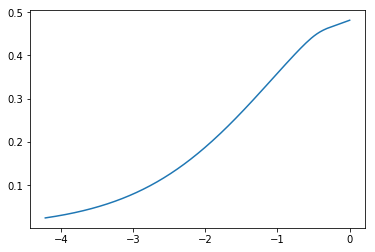

In [292]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x=np.array(syn1_0)

y=np.array(yerrorlmss)

plt.plot(x,y)

plt.show()




# 画出迭代过程中syn1_0值的变化趋势

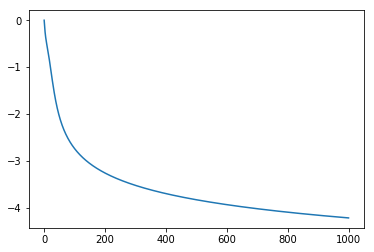

In [298]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

y=np.array(syn1_0)

x=np.array(sk)

plt.plot(x,y)

plt.show()


# 画出迭代过程中，yerrorlms变化趋势

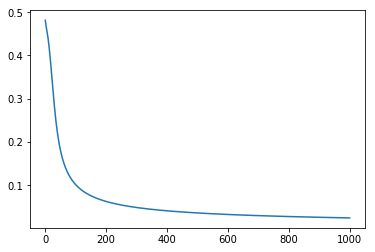

In [299]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

y=np.array(yerrorlmss)

x=np.array(sk)

plt.plot(x,y)

plt.show()


# 作业：修改迭代次数，根据yerrolms的趋势，确定迭代次数的最佳值